Populating the interactive namespace from numpy and matplotlib
0


KeyboardInterrupt: 

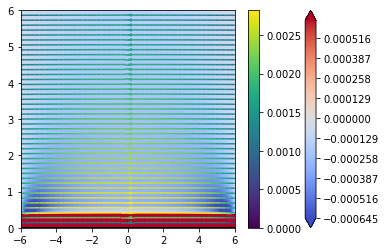

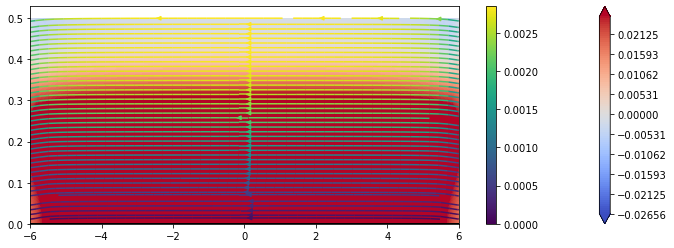

In [1]:
%pylab inline
import time 
import numpy as np 
import matplotlib.pyplot as plt 
t_deb = time.time() 

T=10.0 
h=0.01 
Nt=100 
N_mc=100 
EPS=0.0001 
N0=30
N1=30
N2=45
H=6
H0=3/30
h0=H/N0 
h1=H/N1 
h2=H0/N2

eps=H0/5 
nu=0.1
U0=0.01
G0=1.0
sig=0.01

sqrt2nu=np.sqrt(2*nu) 
sqrth=np.sqrt(h) 
inv2pi = 1/(2*np.pi)

def THETA_0(x):
    return U0*np.ones_like(x)

Xb=np.zeros((2*N1+1,N2+1,2)) #X for boundary layer 
Xo=np.zeros((2*N0+1,N0+1,2)) #X for outer layer 
Wb=np.zeros((2*N1+1,N2+1)) #Initial vorticity in boundary layer 
Wo=np.zeros((2*N0+1,N0+1)) #Initial vorticity in outer layer 
Gb=np.zeros((2*N1+1,N2+1)) #External force in boundary layer 
Go=np.zeros((2*N0+1,N0+1)) #External force in outer layer

INDb=np.ones((2*N1+1,N2+1)) #indicators for Xb 
INDo=np.ones((2*N0+1,N0+1)) #indicators for Xo 

for j1 in range(2*N1+1): #initialise Xb 
    for j2 in range(N2+1): 
        Xb[j1,j2,:]=[(j1-N1)*h1, j2*h2]
        #Gb_plus[j1,j2]=#U0*(1/H-3*(j2h2)2/H3)#U02j2h2/H2#-(1.5U0j2*h2/H2+0.25*U0/H)
for j1 in range(2*N0+1): #initialise Xo 
    for j2 in range(N0+1): Xo[j1,j2,:]=[(j1-N0)*h0, j2*h0]
        #if(j2<N0): Go[j1,j2]=-U0*(1/H-3*((j2-N0)h0)2/H3)#U02(j2-N0)h0/H**2#-(1.5U0(j2-N0)h0/H**2+0.25U0/H)

phi=np.zeros((2*N1+1,N2+1)) 
for j1 in range(2*N1+1): 
    for j2 in range(N2+1): 
        if(Xb[j1,j2,1]>eps/3 and Xb[j1,j2,1]<2*eps/3): 
            phi[j1,j2]=THETA_0(Xb[j1,j2,0])*nu/(eps**2)*324*(Xb[j1,j2,1]/eps-0.5) 
phi=np.reshape(phi,((2*N1+1)*(N2+1)))

for j1 in range(2*N1+1): #initialise Wb 
    for j2 in range(N2+1): 
        if(j2==0): Wb[j1,j2]=U0
        else: Wb[j1,j2]=0
for j1 in range(2*N0+1): #initialise Wo 
    for j2 in range(N0+1):
        if(j2==0): Wo[j1,j2]=U0
        else: Wo[j1,j2]=0 

Gb[:,0]=-np.ones_like(Gb[:,0])*G0
Go[:,0]=-np.ones_like(Go[:,0])*G0
x3_0=np.copy(Xb[:,0,:]) 
Xb=np.reshape(Xb,((2*N1+1)*(N2+1),2)) 
Xo=np.reshape(Xo,((2*N0+1)*(N0+1),2)) 
Gb=np.reshape(Gb,((2*N1+1)*(N2+1))) 
Go=np.reshape(Go,((2*N0+1)*(N0+1))) 
psi=np.copy(Go) 
psi_b=np.copy(Gb)

Wb=np.reshape(Wb,(2*N1+1)*(N2+1)) 
Wo=np.reshape(Wo,(2*N0+1)*(N0+1)) 
INDb=np.reshape(INDb,(2*N1+1)*(N2+1)) 
INDo=np.reshape(INDo,(2*N0+1)*(N0+1))

Ub=np.zeros((2*N1+2,N2+2,2)) 
Uo=np.zeros((2*N0+2,N0+2,2)) 
for j1 in range(2*N0+2): 
    for j2 in range(N0+2): Uo[j1,j2]=[(j1-N0)*h0, j2*h0] 
for j1 in range(2*N1+2): 
    for j2 in range(N2+2): Ub[j1,j2]=[(j1-N1)*h1, j2*h2*5] 
Uo=np.reshape(Uo,((2*N0+2)*(N0+2),2)) 
Ub=np.reshape(Ub,((2*N1+2)*(N2+2),2))

X_th=np.zeros((10*N1+1,2)) 
for j1 in range(10*N1+1): 
    X_th[j1,:]=[(j1-5*N1)*h1/5, 0]

THETA=np.zeros((Nt-1,10*N1+1)) 
Der3=np.zeros((Nt-1,10*N1+1))

X_3der=np.zeros((10*N1+1,5,2)) 
for j1 in range(10*N1+1): 
    for j2 in range(5): 
        X_3der[j1,j2,:]=[(j1-5*N1)*h1/5, j2*h2] 
X_3der_x0=np.copy(X_3der[:,0,0]) 
X_3der=np.reshape(X_3der,((10*N1+1)*5,2))

x1=np.array(Uo[:,0]) 
y1=np.array(Uo[:,1]) 
x2=np.array(Ub[:,0]) 
y2=np.array(Ub[:,1])

def L(x,y): #derivative of K
    X1 = np.ones_like(y[:,0])*x[0] 
    X2 = np.ones_like(y[:,1])*x[1] 
    Y1 = np.array(y[:,0]) 
    Y2 = np.array(y[:,1])

    Sp = (X1-Y1)**2+(X2+Y2)**2
    Sn = (X1-Y1)**2+(X2-Y2)**2

    Exp_p = np.exp(-Sp**2/sig)
    Exp_n = np.exp(-Sn**2/sig)
    Moll_p = (1.0-Exp_p)/(Sp+(Sp==0).astype(float))
    Moll_n = (1.0-Exp_n)/(Sn+(Sn==0).astype(float))
    Moll_p2 = (1.0-Exp_p)/(Sp**2+(Sp==0).astype(float))
    Moll_n2 = (1.0-Exp_n)/(Sn**2+(Sn==0).astype(float))

    Mn_X1=-2*(X1-Y1)*Moll_n2+4*(X1-Y1)*Exp_n/sig
    Mn_X2=-2*(X2-Y2)*Moll_n2+4*(X2-Y2)*Exp_n/sig
    Mp_X1=-2*(X1-Y1)*Moll_p2+4*(X1-Y1)*Exp_p/sig
    Mp_X2=-2*(X2+Y2)*Moll_p2+4*(X2+Y2)*Exp_p/sig

    K=inv2pi*(Moll_n-Moll_p-(Y1-X1)*Mn_X1+(Y1-X1)*Mp_X1)-inv2pi*(-Moll_n-Moll_p+(Y2-X2)*Mn_X2-(Y2+X2)*Mp_X2)
    return K

def Omega(x,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp): #vorticity approximation
    S=np.zeros_like(x[:,0]) 
    wo=Wo*INDo 
    wb=Wb*INDb 
    for j in range(len(x[:,0])): 
        Ko=L(x[j,:],Xo_temp) 
        Kb=L(x[j,:],Xb_temp) 
        S[j]=np.dot(Kb,wb)*h1*h2+np.dot(Ko,wo)*h0*h0+np.dot(Kb,psi_b_temp)*h1*h2*h+np.dot(Ko,psi_temp)*h0*h0*h+np.dot(Kb,phi_temp)*h*h1*h2 
    return S

def K(x,y): #Biot-Savart kernel
    X1 = np.ones_like(y[:,0])*x[0] 
    X2 = np.ones_like(y[:,1])*x[1] 
    Y1 = np.array(y[:,0]) 
    Y2 = np.array(y[:,1])

    Sp = (X1-Y1)**2+(X2+Y2)**2
    Sn = (X1-Y1)**2+(X2-Y2)**2

    Moll_p = (1.0-np.exp(-Sp**2/sig))/(Sp+(Sp==0).astype(float))
    Moll_n = (1.0-np.exp(-Sn**2/sig))/(Sn+(Sn==0).astype(float))

    K = np.zeros_like(y)

    K[:,0] = inv2pi*((Y2-X2)*Moll_n-(Y2+X2)*Moll_p)
    K[:,1] = inv2pi*(-(Y1-X1)*Moll_n+(Y1-X1)*Moll_p)
    return K

def u(x,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp): #velocity approximation
    S=np.zeros_like(x) 
    wo=Wo*INDo 
    wb=Wb*INDb 
    for j in range(len(x[:,0])): 
        Ko=K(x[j,:],Xo_temp) 
        Kb=K(x[j,:],Xb_temp) 
        u1=np.dot(Kb[:,0],wb)*h1*h2+np.dot(Ko[:,0],wo)*h0*h0+np.dot(Kb[:,0],psi_b_temp)*h1*h2*h+np.dot(Ko[:,0],psi_temp)*h0*h0*h+np.dot(Kb[:,0],phi_temp)*h*h1*h2 
        u2=np.dot(Kb[:,1],wb)*h1*h2+np.dot(Ko[:,1],wo)*h0*h0+np.dot(Kb[:,1],psi_b_temp)*h1*h2*h+np.dot(Ko[:,1],psi_temp)*h0*h0*h+np.dot(Kb[:,1],phi_temp)*h*h1*h2 
        S[j,0]=u1 
        S[j,1]=u2 
    return S

for t in range(Nt-1): 
    print(t) 
    Xb_temp=np.copy(Xb[:,:]) 
    Xo_temp=np.copy(Xo[:,:]) 
    phi_temp=np.copy(phi) 
    psi_temp=np.copy(psi) 
    psi_b_temp=np.copy(psi_b)

    Xb_upd=h*u(Xb_temp,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp)+sqrt2nu*sqrth*np.random.randn((2*N1+1)*(N2+1),2)
    Xo_upd=h*u(Xo_temp,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp)+sqrt2nu*sqrth*np.random.randn((2*N0+1)*(N0+1),2)
    U1=u(Uo,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp)
    U2=u(Ub,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp)
    U_3der=u(X_3der,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp).reshape((10*N1+1,5,2))

    for j in range(len(Xb_temp[:,0])):
        if(INDb[j]==1.0 and Xb_temp[j,1]*(Xb_temp[j,1]+Xb_upd[j,1])<0):
            x0 = Xb_temp[j,0]-Xb_temp[j,1]*Xb_upd[j,0]/Xb_upd[j,1]
            INDb[j]=0.0
            phi[j]=0.0
            psi_b[j]=0.0
            Xb_temp[j,0]=x0
            Xb_temp[j,1]=0
    for j in range(len(Xo_temp[:,0])):
        if(INDo[j]==1.0 and Xo_temp[j,1]*(Xo_temp[j,1]+Xo_upd[j,1])<0):
            x0 = Xo_temp[j,0]-Xo_temp[j,1]*Xo_upd[j,0]/Xo_upd[j,1]
            INDo[j]=0.0
            psi[j]=0.0
            Xo_temp[j,0]=x0
            Xo_temp[j,1]=0

    Xb[:,0]=Xb_temp[:,0]+Xb_upd[:,0]*INDb
    Xb[:,1]=Xb_temp[:,1]+Xb_upd[:,1]*INDb
    Xo[:,0]=Xo_temp[:,0]+Xo_upd[:,0]*INDo
    Xo[:,1]=Xo_temp[:,1]+Xo_upd[:,1]*INDo

    a1=np.array(U1[:,0]).reshape((2*N0+2,N0+2))
    b1=np.array(U1[:,1]).reshape((2*N0+2,N0+2))
    a2=np.array(U2[:,0]).reshape((2*N1+2,N2+2))
    b2=np.array(U2[:,1]).reshape((2*N1+2,N2+2))

    Wo_temp=(b1[1:,:-1]-b1[:-1,:-1])/h0-(a1[:-1,1:]-a1[:-1,:-1])/h0
    Wb_temp=(b2[1:,:-1]-b2[:-1,:-1])/h1-(a2[:-1,1:]-a2[:-1,:-1])/h2

    W_bound_pos=np.copy(Xb)
    W_bound_pos[:,1]=np.zeros_like(W_bound_pos[:,1])

    W_bound=Omega(W_bound_pos,Xo_temp,Xb_temp,phi_temp,psi_temp,psi_b_temp)

    THETA[t,:]=-(-25*U_3der[:,0,0]/12+4*U_3der[:,1,0]-3*U_3der[:,2,0]+4*U_3der[:,3,0]/3-0.25*U_3der[:,4,0])/h2
    Der3[t,:]=nu*(-2.5*U_3der[:,0,0]+9*U_3der[:,1,0]-12*U_3der[:,2,0]+7*U_3der[:,3,0]-1.5*U_3der[:,4,0])/h2**3

    for j in range(len(Xb_temp[:,0])):
        if(Xb[j,0]>=0 and Xb[j,1]>eps/3 and Xb[j,1]<2*eps/3):
            phi[j]=phi[j]+nu/(eps**2)*W_bound[j]*324*(Xb[j,1]/eps-0.5)

    psi=psi_temp+Go
    psi_b=psi_b_temp+Gb
    
    M=np.average(abs(Wo_temp))
    st=M/50
    l=np.arange(-M,M,step=st)
    figure()
    plt.contourf(x1.reshape((2*N0+2,N0+2))[:-1,:-1], y1.reshape((2*N0+2,N0+2))[:-1,:-1], Wo_temp, vmax=M, vmin=-M, extend="both", cmap="coolwarm", levels=l)
    colorbar()
    st1=plt.streamplot(x1.reshape((2*N0+2,N0+2))[:-1,:-1].T, y1.reshape((2*N0+2,N0+2))[:-1,:-1].T, a1[:-1,:-1].T, b1[:-1,:-1].T,color=np.sqrt(a1[:-1,:-1].T**2+b1[:-1,:-1].T**2),cmap ='viridis',arrowsize=0.45,density=1.5)
    colorbar(st1.lines)
    plt.plot([-H,H], [0,0], linewidth=2, color="k")
    S="fig_4"+str(t)+".png"
    plt.savefig(S, dpi=300)
    plt.close
    
    M=np.average(abs(Wb_temp))
    st=M/50
    l=np.arange(-M,M,step=st)
    figure(figsize=(12,4))
    plt.contourf(x2.reshape((2*N1+2,N2+2))[:-1,:-1], y2.reshape((2*N1+2,N2+2))[:-1,:-1],Wb_temp,vmax=M, vmin=-M, extend="both", cmap="coolwarm", levels=l)
    colorbar()
    st3=plt.streamplot(x2.reshape((2*N1+2,N2+2))[:-1,:-1].T, y2.reshape((2*N1+2,N2+2))[:-1,:-1].T, a2[:-1,:-1].T, b2[:-1,:-1].T,color=np.sqrt(a2[:-1,:-1].T**2+b2[:-1,:-1].T**2),cmap ='viridis',arrowsize=0.8,density=1.5)
    colorbar(st3.lines)
    plt.plot([-H,H], [0,0], linewidth=2, color="k")
    S="fig_5_upper_plate"+str(t)+".png"
    plt.savefig(S, dpi=300)
    plt.close
    
X, Y = np.meshgrid(X_3der_x0, np.arange(h, Nt*h, h))

fig = plt.figure(figsize = (12,10)) 
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(X, Y, THETA, cmap = plt.cm.coolwarm) 
ax.set_xlabel('x', labelpad=20) 
ax.set_ylabel('t', labelpad=20) 
#ax.set_zlabel('', labelpad=20) 
#fig.colorbar(surf, shrink=0.5, aspect=8) 
plt.show() 
TP="THETA_plus.png" 
plt.savefig(TP, dpi=300) 
plt.close

fig = plt.figure(figsize = (12,10)) 
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(X, Y, Der3, cmap = plt.cm.coolwarm) 
ax.set_xlabel('x', labelpad=20) 
ax.set_ylabel('t', labelpad=20) 
#ax.set_zlabel('Theta', labelpad=20) 
#fig.colorbar(surf, shrink=0.5, aspect=8) 
plt.show() 
TP="THETA3der.png" 
plt.savefig(TP, dpi=300) 
plt.close